In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
'''The desk now has the price data they need. The final ingredient before they can begin trading with the client is the pricing model. 
Alex tells you the client wants to start trading as soon as possible. They believe the winter will be colder than expected, so they want 
to buy gas now to store and sell in winter in order to take advantage of the resulting increase in gas prices. They ask you to write a script 
that they can use to price the contract. The concept is simple: any trade agreement is as valuable as the price you can sell minus the price at 
which you are able to buy. Any cost incurred as part of executing this agreement is also deducted from the overall value. 
There are additional costs involved, such as having to pay the storage facility owner a fixed fee of $100K a month, 
the injection/withdrawal cost, like having to pay the storage facility owner $10K per 1 million MMBtu for injection/withdrawal,
 I am supposed to foot a bill of $50K each time for transporting the gas to and from the facility.'''

In [9]:
df=pd.read_csv('E:\\Shirin Gangal\\Python\\Python_learning\\Udemy ML\\Nat_Gas.csv')
df['Dates'] = pd.to_datetime(df['Dates'])


C:\Users\Welcome\AppData\Local\Temp\ipykernel_10176\3958363018.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


In [10]:
prices = df['Prices'].astype(float)
def date_to_ordinal(date):
    return date.toordinal()

In [11]:
ordinal_dates = df['Dates'].apply(date_to_ordinal)

In [12]:
Y = np.array(prices)
X= np.array(ordinal_dates).reshape(-1,1)
model = LinearRegression ()
model.fit(X,Y)

LinearRegression()

In [30]:
def predict_price(month, day, year):
    target_date = date(year, month, day).toordinal()
    return round(model.predict([[target_date]])[0],2)

In [36]:
MMBtu = int(input("How many MMBtu of natural gas do you want to buy?:"))
# A Btu is the amount of heat needed to raise the temperature of one pound of water by one degree Fahrenheit.
# A British thermal unit (Btu) is a unit of heat energy, and one cubic foot of natural gas typically contains around 1,030 Btu.
#1 MMBtu = 1 million BTu = 28.263682 m3 of natural gas at defined temperature and pressure. 

How many MMBtu of natural gas do you want to buy?: 100000


In [37]:
def get_valid_date(prompt):
    #while True:
     #   try: 
        print(f"\n {prompt}")
        year = int(input("Enter year:"))
        month=int(input("Enter month:"))
        day = int(input("Enter day:"))
            
        if not (2020 <= year <= 2025):
                raise ValueError
        user_date = date(year, month, day)
        if not(date(2020, 10, 31) <= user_date <= date(2025, 10, 31)):
                raise ValueError
        return user_date
       # except ValueError:
       #     print("\n Invalid input, please enter a valid date.")

In [24]:
inj_date = get_valid_date("Enter an injection date (btw 10/31/2020 and 10/31/2025)")


 Enter an injection date (btw 10/31/2020 and 10/31/2025)


Enter year: 2023
Enter month: 04
Enter day: 04


In [27]:
while True:
	with_date = get_valid_date(f"Enter a withdrawal date after {inj_date}")
	if with_date > inj_date:
		break
	print("\n withdrawal date must be after injection date.")



 Enter a withdrawal date after 2023-04-04


Enter year: 2024
Enter month: 01
Enter day: 01


In [28]:
print(inj_date)
print(with_date)

2023-04-04
2024-01-01


In [31]:
inj_price = predict_price(inj_date.month, inj_date.day, inj_date.year)

In [32]:
with_price = predict_price(with_date.month, with_date.day, with_date.year)



In [39]:
print(f"\nPredicted injection price on {inj_date}: ${inj_price}")
print(f"Predicted withdrawal price on {with_date}: ${with_price}")

# --------- Contract Pricing Function ---------
import math
def price_contract(in_date, inj_price, out_date, out_price, rate, storage_cost_rate, injection_withdrawal_cost_rate, total_vol):
    volume = 0
    buy_cost = 0
    cash_in = 0

    # Injection
    if volume <= total_vol - rate:
        volume += rate   # volume = volume + Rate
        buy_cost += rate * inj_price + (rate * injection_withdrawal_cost_rate)
        print(f"Injected {rate} MMBtu on {in_date} at ${inj_price}")
    else:
        print("Not enough storage volume to inject.")

    # Withdrawal
    if volume >= rate:
        volume -= rate # volume = vol - rate
        cash_in += rate * out_price - (rate * injection_withdrawal_cost_rate)
        print(f"Withdrew {rate} MMBtu on {out_date} at ${out_price}")
    else:
        print("Not enough gas to withdraw.")

    # Storage cost (monthly)
    months_held = math.ceil((out_date - in_date).days / 30)
    store_cost = months_held * storage_cost_rate

    # Final contract value
    value = cash_in - store_cost - buy_cost
    return round(value, 2)

# Parameters
rate = MMBtu
storage_cost_rate = 1000
injection_withdrawal_cost_rate = 0.0005
max_storage_volume = 500000
# This meant every injection and withdrawal moved 100,000 cubic feet (or MMBtu, assuming 1 cf ≈ 1 MMBtu here for simplicity).

# Calculate contract value
contract_value = price_contract(inj_date, inj_price, with_date, with_price, rate, storage_cost_rate, injection_withdrawal_cost_rate, max_storage_volume)

print(f"\nEstimated contract value: ${contract_value:,.2f}")


Predicted injection price on 2023-04-04: $11.43
Predicted withdrawal price on 2024-01-01: $11.77
Injected 100000 MMBtu on 2023-04-04 at $11.43
Withdrew 100000 MMBtu on 2024-01-01 at $11.77

Estimated contract value: $23,900.00


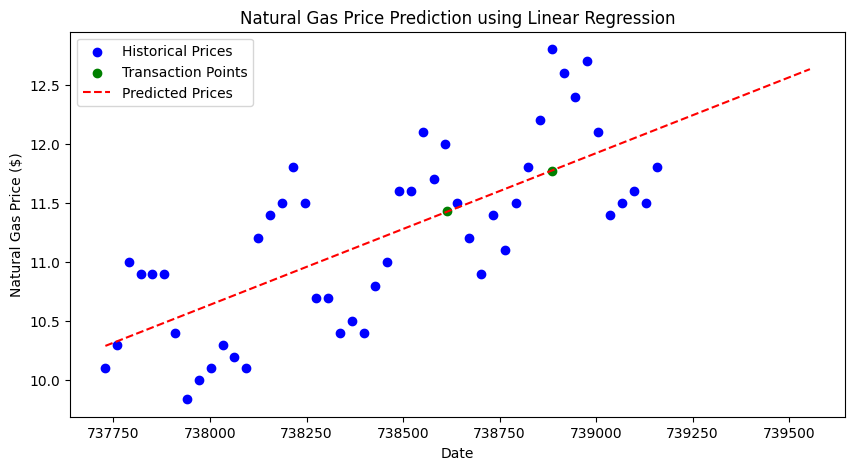

In [40]:
plt.figure(figsize=(10, 5))
plt.scatter(ordinal_dates, prices, color='blue', label="Historical Prices")
plt.scatter([inj_date.toordinal(), with_date.toordinal()], [inj_price, with_price], color='green', label="Transaction Points")
future_dates = np.arange(ordinal_dates[0], date(2025, 10, 31).toordinal()).reshape(-1, 1)
future_prices = model.predict(future_dates)
plt.plot(future_dates, future_prices, color='red', linestyle="dashed", label="Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Natural Gas Price ($)")
plt.title("Natural Gas Price Prediction using Linear Regression")
plt.legend()
plt.show()

# This is a seasonal data so a time series analysis using Sarima would better predict the prices than the linear regression model.